In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Data visualisation
import seaborn as sns # Data visualization

In [2]:
df = pd.read_csv('cleaned_final_movie_data.csv')

In [3]:
df.shape

(2728, 22)

In [4]:
df.head()

,Unnamed: 0,Title,Domestic_Gross,Year,Rating,imdb_id,budget,genres,original_language,popularity,...,release_date,revenue,runtime,vote_average,vote_count,main_genre,main_production,main_production_country,Foreign_Gross,Profit
0,0,Toy Story 4,434038008,2019,G,tt1979376,175000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",en,34.489,...,2019-06-19,1073394593,100,7.6,5029,'Adventure','Walt Disney Pictures','United States of America',639356585,898394593
1,1,The Lion King,422783777,1994,G,tt0110357,45000000,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",en,32.284,...,1994-05-07,987483777,89,8.3,12393,'Family','Walt Disney Pictures','United States of America',564700000,942483777
2,2,Toy Story 3,415004880,2010,G,tt0435761,200000000,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",en,27.214,...,2010-06-16,1066969703,103,7.8,10168,'Animation','Pixar','United States of America',651964823,866969703
3,3,Finding Nemo,380843261,2003,G,tt0266543,94000000,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",en,34.417,...,2003-05-30,940335536,100,7.8,13547,'Animation','Pixar','United States of America',559492275,846335536
4,4,"Monsters, Inc.",289916256,2001,G,tt0198781,115000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,41.313,...,2001-11-01,562816256,92,7.8,12668,'Animation','Pixar','United States of America',272900000,447816256


## Exploring Number of Movies by Rating

###### Setting x and y for each Movie rating subplot

In [5]:
y_g = df[(df['Rating']=='G') & (df['Year']>'1980')].groupby('Year')['Title'].count()
x_g = df[(df['Rating']=='G') & (df['Year']>'1980')].groupby('Year')['Title'].count().index

In [6]:
y_pg = df[(df['Rating']=='PG') & (df['Year']>'1980')].groupby('Year')['Title'].count()
x_pg = df[(df['Rating']=='PG') & (df['Year']>'1980')].groupby('Year')['Title'].count().index

In [7]:
y_thirt = df[(df['Rating']=='PG-13') & (df['Year']>'1980')].groupby('Year')['Title'].count()
x_thirt = df[(df['Rating']=='PG-13') & (df['Year']>'1980')].groupby('Year')['Title'].count().index

In [8]:
y_r = df[(df['Rating']=='R') & (df['Year']>'1980')].groupby('Year')['Title'].count()
x_r = df[(df['Rating']=='R') & (df['Year']>'1980')].groupby('Year')['Title'].count().index

###### Converting strings to integers for x variables

In [9]:
x_g = [int(i) for i in x_g]
x_pg = [int(i) for i in x_pg]
x_Xii = [int(i) for i in x_thirt]
x_r = [int(i) for i in x_r]

###### Plotting Data

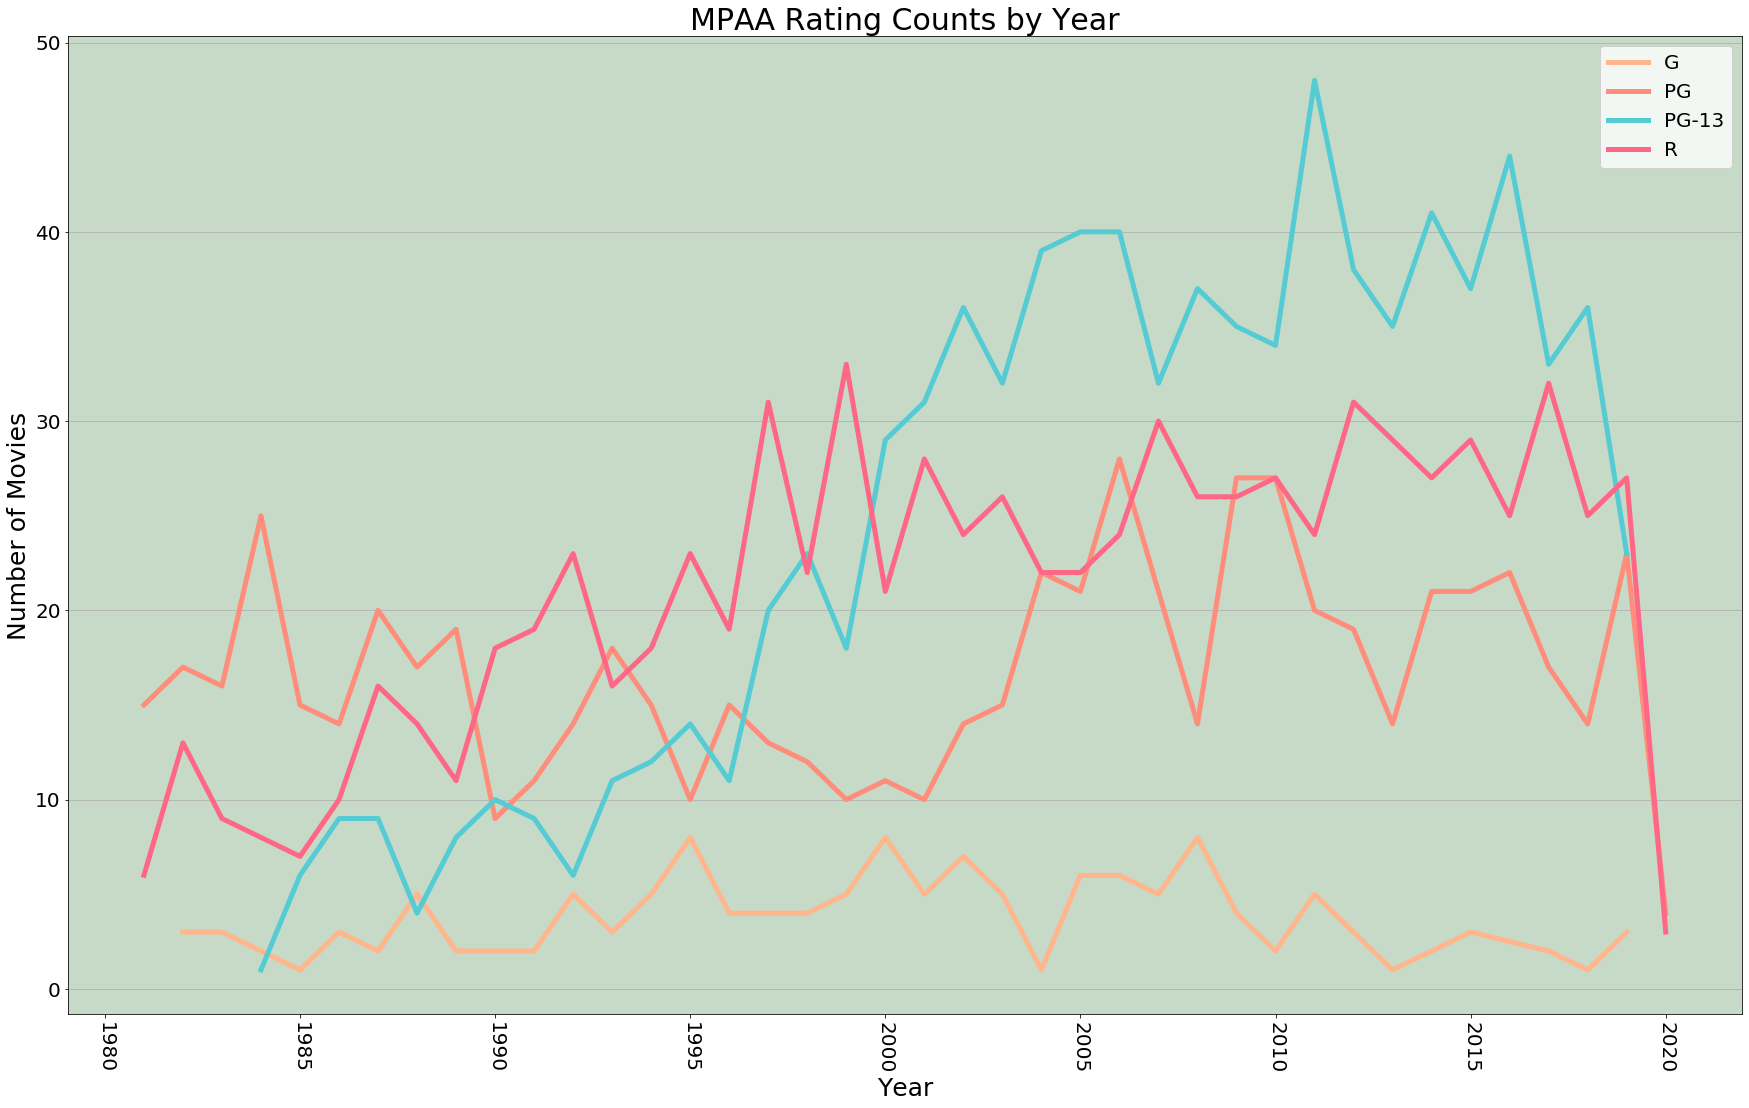

In [10]:
fig, ax = plt.subplots(figsize=(30,18))

#creating line graphs for each dataset
ax.plot(x_g, y_g, label='G', linewidth = 5, color='#FFB68C')
ax.plot(x_pg, y_pg, label='PG', linewidth = 5, color ='#FE8E7B')
ax.plot(x_Xii, y_thirt, label='PG-13', linewidth = 5, color ='#55CBD3')
ax.plot(x_r, y_r, label='R', linewidth = 5, color = '#FF6787')

#rotating x-axis ticks and making each axis font bigger
plt.xticks(rotation = -90)
ax.tick_params(axis='both', which='major', labelsize=20)

#setting title and axis labels
ax.set_title('MPAA Rating Counts by Year', fontsize = 30)
ax.set_ylabel('Number of Movies', fontsize = 25)
ax.set_xlabel('Year', fontsize = 25)

#setting background color, turning off x-axis grid, making legend font bigger
ax.grid(axis = 'y')
ax.set_facecolor('#C7DAC7')
ax.legend(fontsize = 20)

## Exploring Budget vs. Profitability for each Rating

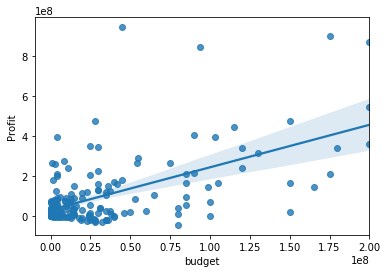

In [11]:
# budget vs. profitability for G movies
fig, ax = plt.subplots()
sns.regplot(df[df['Rating'] == 'G']['budget'], df[df['Rating'] == 'G']['Profit'])

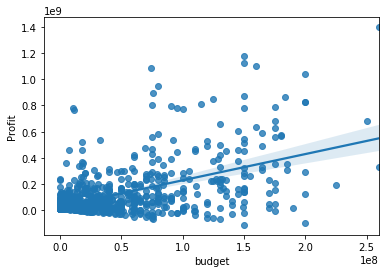

In [12]:
# budget vs. profitability for PG movies
fig, ax = plt.subplots()
sns.regplot(df[df['Rating'] == 'PG']['budget'], df[df['Rating'] == 'PG']['Profit'])

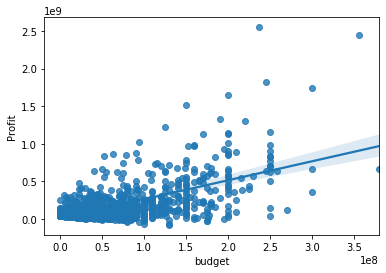

In [13]:
# budget vs. profitability for PG-13 movies
fig, ax = plt.subplots()
sns.regplot(df[df['Rating'] == 'PG-13']['budget'], df[df['Rating'] == 'PG-13']['Profit'])

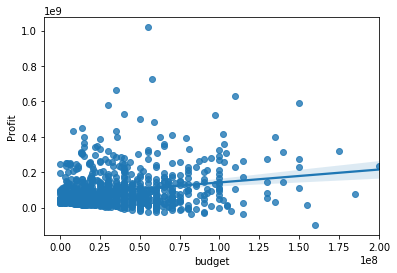

In [14]:
# budget vs. profitability for R movies
fig, ax = plt.subplots()
sns.regplot(df[df['Rating'] == 'R']['budget'], df[df['Rating'] == 'R']['Profit'])

###### We found that PG-13 movies seemed to be the most profitable but the data was not easily displayed in these graphs. Moved on to other data analysis to look more into it.

## Diving Deeper into different revenue numbers for each Rating

###### We tried to overlay all the previous data onto one graph but it was too cluttered to be of any value to us. It was not eye-catching at all.

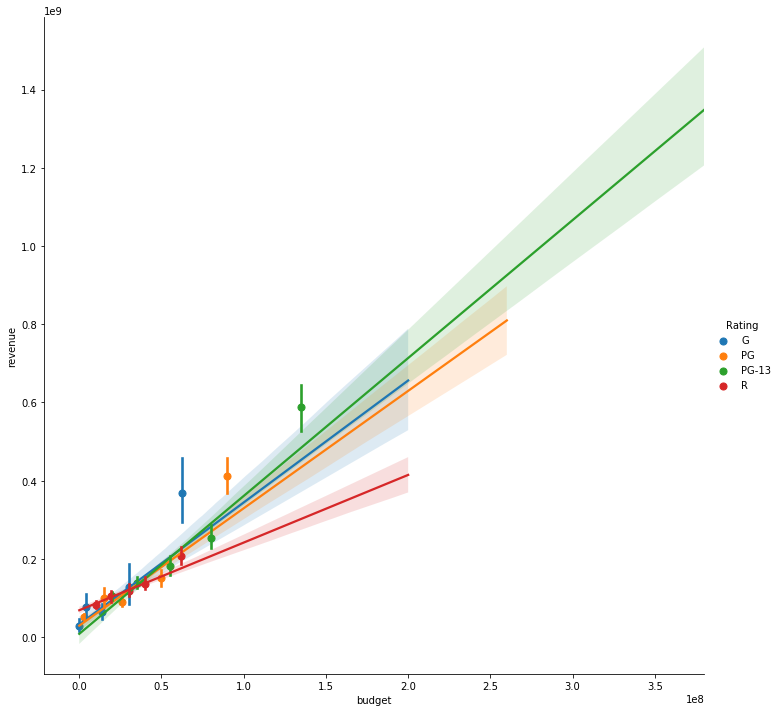

In [15]:
#plt.figure(figsize=(70,42))
sns.lmplot(x='budget', y = 'revenue', hue='Rating', data = df,x_bins = 5, height = 10, aspect = 1)

### Using different plot style to try and show what data represents

In [16]:
#sets colors to use for points in graph
colors = ['#FFB68C','#FE8E7B','#55CBD3','#FF6787']

Text(0.5, 0, 'MPAA Rating')

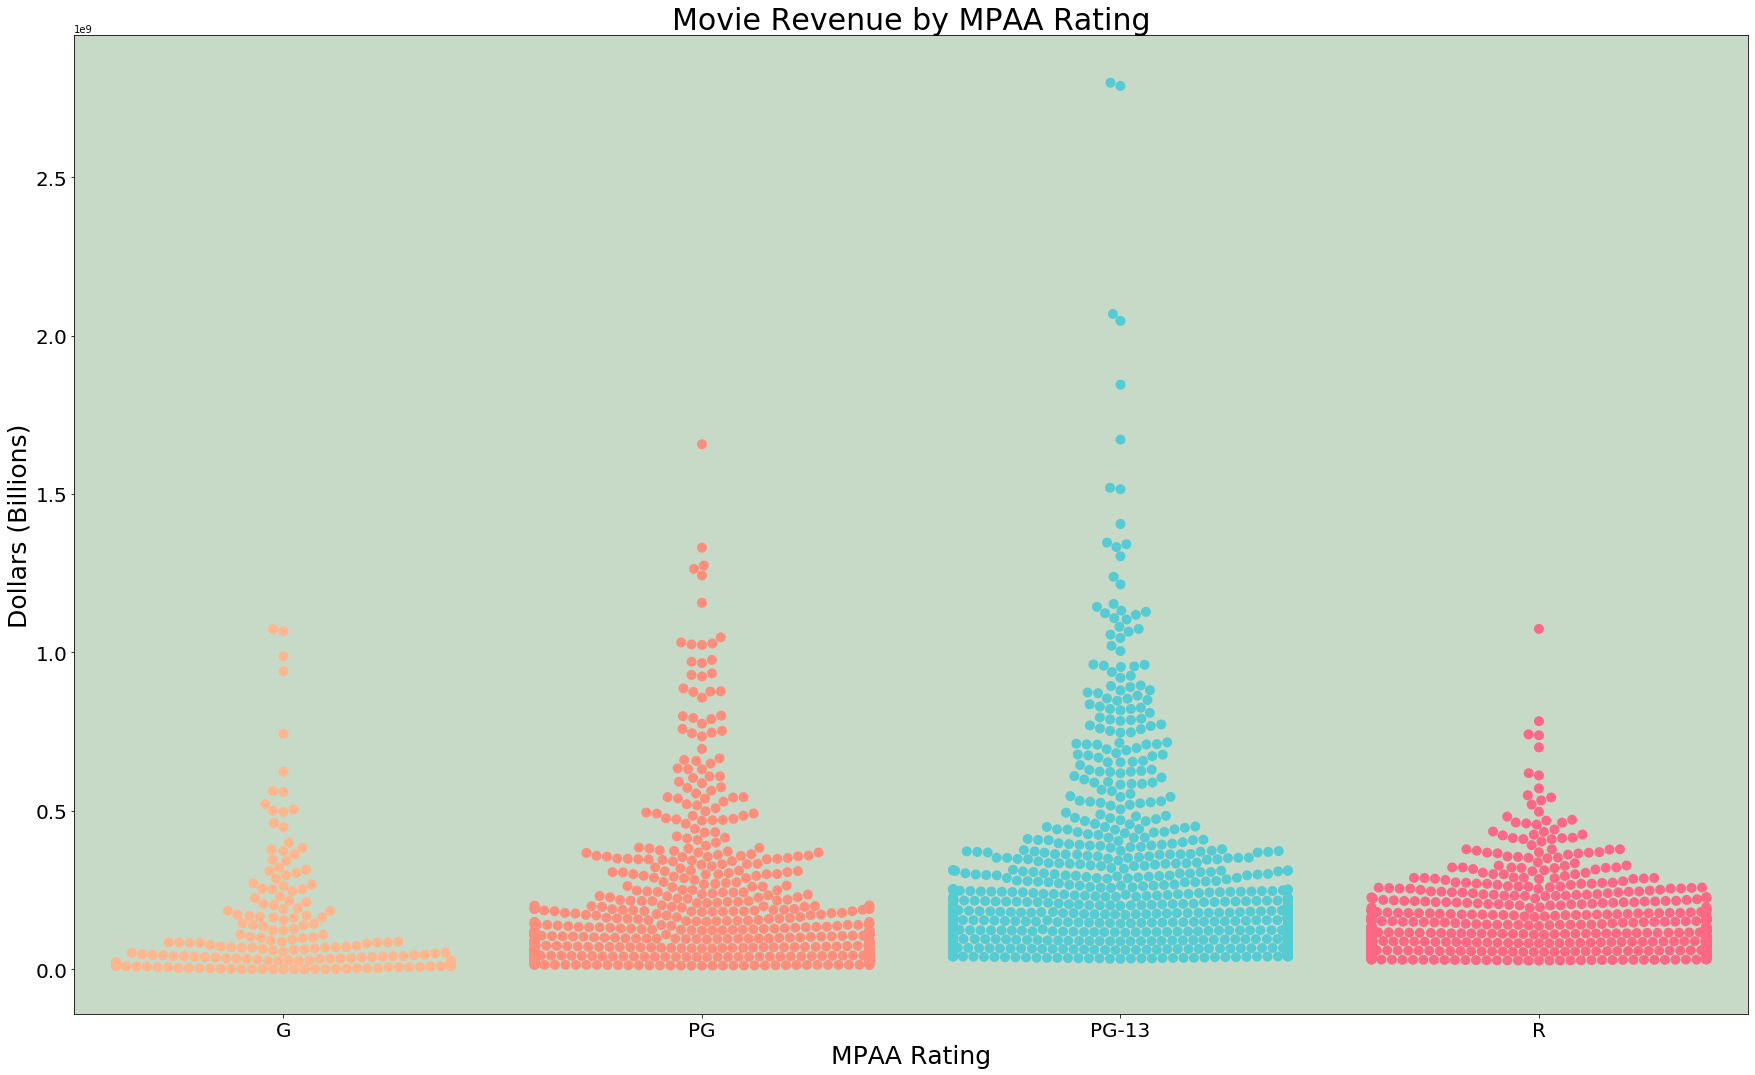

In [17]:
fig, ax = plt.subplots(figsize=(30,18))

#set tick size for eac axis and background color
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_facecolor('#C7DAC7')

#sets title for graph
ax.set_title('Movie Revenue by MPAA Rating', fontsize = 30)

#create a color palette for the dots using the colors list and plot data
sns.set_palette(colors)
sns.swarmplot(x='Rating', y='revenue', data=df, size = 10)

#set major axis labels and size
ax.set_ylabel('Dollars (Billions)', fontsize = 25)
ax.set_xlabel('MPAA Rating', fontsize = 25)



With this graph we were able to show that there are a higher number of movies generating more revenue in the PG-13 category than any other Rating. We should target this audience and analyze this category even further.

## Investigate if there is any replationship between budget, revenue, profit, and genre

###### Looking into this dataset, we removed the 'Animation' genre as it only had one movie in it. The movie performed very well at the box office and skewed the data to make it look like 'Animation' was the top performing genre.

In [18]:
df[(df['Rating']=='PG-13') & (df['main_genre']!=" 'Animation'")].groupby('main_genre').mean().sort_values(by = 'Profit', ascending=False)

,Unnamed: 0,Domestic_Gross,budget,popularity,revenue,runtime,vote_average,vote_count,Foreign_Gross,Profit
main_genre,,,,,,,,,,
'Adventure',1678.942857,1.730925e+08,1.200114e+08,22.253771,4.601233e+08,128.200000,6.652381,5685.714286,2.870308e+08,3.401118e+08
'Science Fiction',1692.468750,1.833034e+08,1.275063e+08,43.289125,4.538076e+08,121.968750,6.353125,6075.687500,2.705042e+08,3.263013e+08
'Action',1758.145923,1.445639e+08,1.096652e+08,21.680185,3.863752e+08,117.055794,6.322747,5087.012876,2.418113e+08,2.767100e+08
'Fantasy',1821.076923,1.291873e+08,8.128846e+07,21.160577,3.154055e+08,115.807692,6.561538,4739.807692,1.862182e+08,2.341170e+08
'History',1772.142857,1.107414e+08,6.500000e+07,20.933571,2.470653e+08,145.142857,7.342857,4189.857143,1.363239e+08,1.820653e+08
'Mystery',1963.333333,9.014596e+07,4.966667e+07,21.821889,2.096223e+08,111.333333,6.611111,3081.000000,1.194764e+08,1.599557e+08
'Thriller',1868.692308,8.400307e+07,5.670256e+07,18.372769,1.967744e+08,111.615385,6.366667,3163.333333,1.127713e+08,1.400718e+08
'War',1849.500000,9.235647e+07,8.375000e+07,22.434750,2.121196e+08,114.000000,6.475000,3831.750000,1.197631e+08,1.283696e+08
'Music',1947.500000,7.002948e+07,2.200000e+07,14.651750,1.471449e+08,98.750000,6.750000,1796.250000,7.711543e+07,1.251449e+08


###### Setting y variables for graph

In [19]:
y_budget = df[(df['Rating']=='PG-13') & (df['main_genre']!=" 'Animation'")].groupby('main_genre').mean().sort_values(by = 'Profit', ascending=False)['budget']
y_profit = df[(df['Rating']=='PG-13') & (df['main_genre']!=" 'Animation'")].groupby('main_genre').mean().sort_values(by = 'Profit', ascending=False)['Profit']
y_revenue = df[(df['Rating']=='PG-13') & (df['main_genre']!=" 'Animation'")].groupby('main_genre').mean().sort_values(by = 'Profit', ascending=False)['revenue']

###### Setting x variable and cleaning the strings to have a cleaner looking x label

In [20]:
x_bpr = df[(df['Rating']=='PG-13') & (df['main_genre']!=" 'Animation'")].groupby('main_genre').mean().sort_values(by = 'Profit', ascending=False).index

In [21]:
x_bpr = [i.replace("'","") for i in x_bpr] 

###### Plotting data

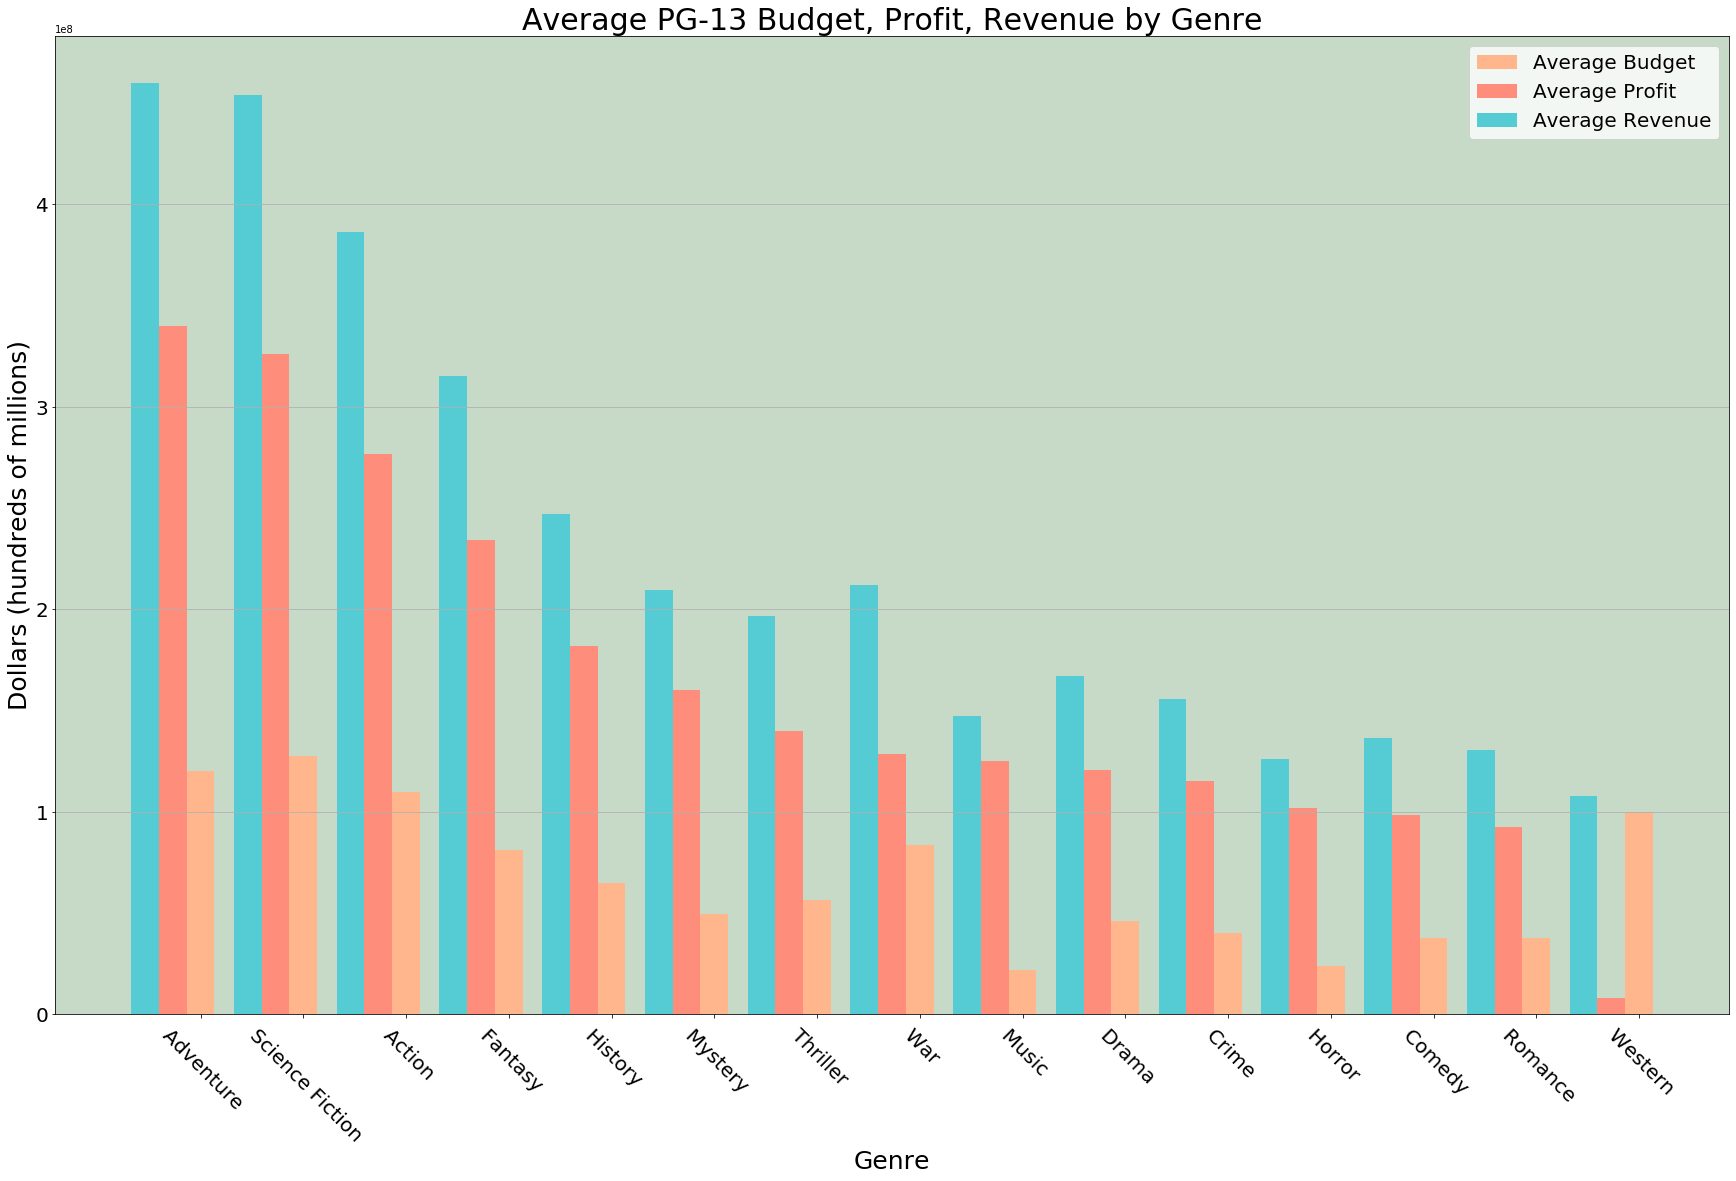

In [22]:
fig, ax = plt.subplots(figsize=(30,18))
width = 0.27

#turn x variable data into np array so we can easily work with the width 
x_2 = np.arange(len(x_bpr))

#plotting data and moving each bar so all three can be displayed for each genre
ax.bar(x_2 + width, y_budget, label='Average Budget', width = width, linewidth = 5, color='#FFB68C')
ax.bar(x_2, y_profit, label='Average Profit', width = width, linewidth = 5, color ='#FE8E7B')
ax.bar(x_2 - width, y_revenue, label='Average Revenue', width = width, linewidth = 5, color ='#55CBD3')

#setting x-axis ticks and labels , rotating labels, and chingin font size
ax.set_xticks(x_2+width)
ax.set_xticklabels(x_bpr)
plt.xticks(rotation = -45)
ax.tick_params(axis='both', which='major', labelsize=20)

#Setting graph title, major axis labels, and other stylistc shoices
ax.set_title('Average PG-13 Budget, Profit, Revenue by Genre', fontsize = 30)
ax.set_ylabel('Dollars (hundreds of millions)', fontsize = 25)
ax.set_xlabel('Genre', fontsize = 25)
ax.grid(axis = 'y')
ax.set_facecolor('#C7DAC7')
ax.legend(fontsize = 20)

## Discovering which Studios are top competitors in the PG-13 category

###### Create table with top performing Production studios

In [23]:
df_top_companies = df[(df['Rating']=='PG-13') & (df['main_production_country']==" 'United States of America'") | (df['main_production_country']==" 'United States of America' ")].groupby('main_production').sum().sort_values(by = 'Profit', ascending=False).head(20)

In [24]:
df_top_companies.head(10)

,Unnamed: 0,Domestic_Gross,budget,popularity,revenue,runtime,vote_average,vote_count,Foreign_Gross,Profit
main_production,,,,,,,,,,
'Marvel Studios',32700,8545472257,4368000000,905.515,22486468045,3002,168.4,329916,13940995788,18118468045
'Universal Pictures',93279,5270769329,3251200000,773.329,11750968800,5738,320.7,150842,6480199471,8499768800
'Paramount',77305,4802496201,2470000000,698.876,10437794117,4698,272.5,126049,5635297916,7967794117
'Columbia Pictures',65391,3356883937,2260200000,518.034,6536240344,3838,217.1,96586,3179356407,4276040344
'Lucasfilm Ltd.',10518,2508647520,1119000000,266.624,5230230966,954,48.7,47251,2721583446,4111230966
'Dune Entertainment',10543,1431807796,556000000,129.435,4149467441,687,38.8,45130,2717659645,3593467441
'Amblin Entertainment',23406,1507925647,1093000000,222.428,4112565382,1569,88.2,46104,2604639735,3019565382
'Hasbro Studios',5622,1319187682,755000000,41.635,3773861624,612,24.7,24596,2454673942,3018861624
'Touchstone Pictures',38889,2024134578,1033000000,339.474,3770642491,2527,146.9,46607,1746507913,2737642491


###### getting x-variable data and cleaning so it looks better when displayed

In [25]:
x_studios = df_top_companies.head(10).index

In [26]:
x_studios = [i.replace("'","") for i in x_studios] 

###### Plotting Data

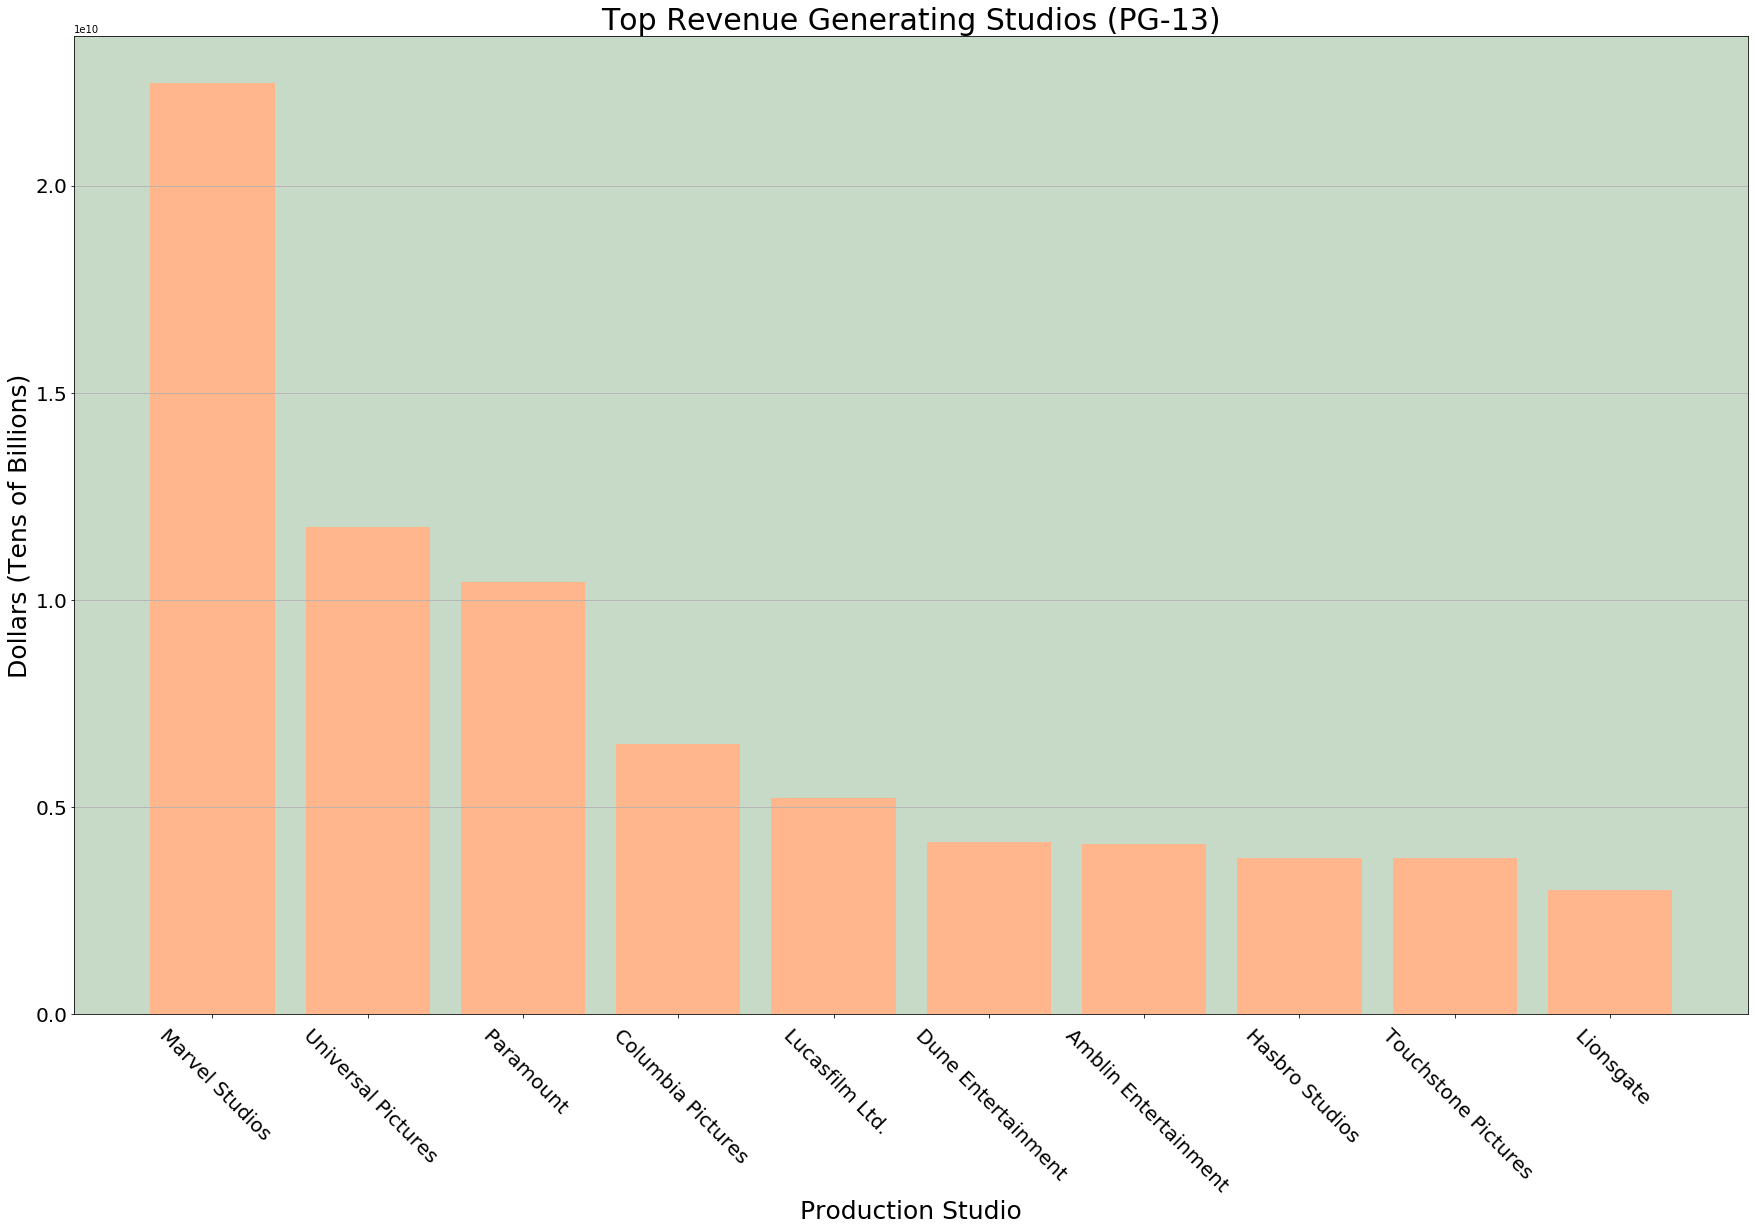

In [27]:
fig, ax = plt.subplots(figsize=(30,18))

x_3 = np.arange(len(x_studios))

#plotting data
ax.bar(x_3, df_top_companies.head(10)['revenue'], label='Production Company', linewidth = 5, color='#FFB68C')

#setting x axis ticks, rotating them look cleaner, making font bigger
ax.set_xticks(x_3)
ax.set_xticklabels(x_studios)
plt.xticks(rotation = -45)
ax.tick_params(axis='both', which='major', labelsize=20)

#setting title and axis labels and smale stylistic choices 
ax.set_title('Top Revenue Generating Studios (PG-13)', fontsize = 30)
ax.set_ylabel('Dollars (Tens of Billions)', fontsize = 25)
ax.set_xlabel('Production Studio', fontsize = 25)
ax.grid(axis = 'y')
ax.set_facecolor('#C7DAC7')


###### With this data we were able to show that Marvel would be the biggest competitor.